In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sympy import *
from cvxopt import matrix,solvers 

In [2]:
df=pd.read_csv('Iris.csv')
X=df[['PetalLengthCm','SepalWidthCm','Species']]
X.columns=['x1','x2','ω']
X.loc[X['ω']=='Iris-setosa',['ω']]=0
X.loc[X['ω']!=0,['ω']]=1
Y=X.copy()
Y.insert(2,'x3',np.ones(150))
Y.loc[Y['ω']==1,['x1','x2','x3']]=-1*Y.loc[Y['ω']==1]
print(Y)

      x1   x2   x3  ω
0    1.4  3.5  1.0  0
1    1.4  3.0  1.0  0
2    1.3  3.2  1.0  0
3    1.5  3.1  1.0  0
4    1.4  3.6  1.0  0
..   ...  ...  ... ..
145 -5.2 -3.0 -1.0  1
146 -5.0 -2.5 -1.0  1
147 -5.2 -3.0 -1.0  1
148 -5.4 -3.4 -1.0  1
149 -5.1 -3.0 -1.0  1

[150 rows x 4 columns]


In [3]:
x1=Symbol('x1')
x2=Symbol('x2')
y=np.asarray([x1,x2,1])
x1w0=X.loc[X['ω']==0,['x1']]
x2w0=X.loc[X['ω']==0,['x2']]
x1w1=X.loc[X['ω']==1,['x1']]
x2w1=X.loc[X['ω']==1,['x2']]

perceptron

In [4]:
a=np.array([0,0,0])
eta=0.01
n=150   
i=0
loop=0
itr=0
while(loop<n-1):
     yi=np.asarray(Y[['x1','x2','x3']].iloc[i])
     if(a@yi.T<=0):
          a=a+eta*yi
          loop=-1
          itr=itr+1
     else:
          loop=loop+1
     i=(i+1)%n
print("a =",a)

a = [-0.052  0.041  0.01 ]


Decision Boundary: -0.052*x1 + 0.041*x2 + 0.01 = 0


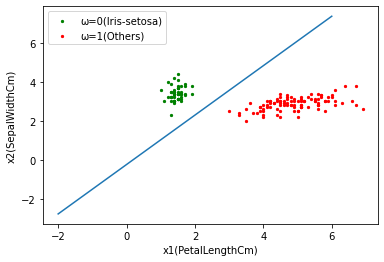

In [5]:
print("Decision Boundary:",a@y.T,"= 0")
g=solve(a@y.T,x2,dict=True)
xx=np.linspace(-2,6,100)
yy=np.asarray([lambdify(x1,g[0][x2])(val) for val in xx])
plt.plot(xx,yy.T)
plt.scatter(x1w0,x2w0,label="ω=0(Iris-setosa)",color="green",marker=".",s=20)
plt.scatter(x1w1,x2w1,label="ω=1(Others)",color="red",marker=".",s=20) 
plt.xlabel('x1(PetalLengthCm)')
plt.ylabel('x2(SepalWidthCm)')
plt.legend()
plt.show()

SVM

In [6]:
n=150
X=X[['x1','x2']].to_numpy()
Y=Y[['x3']].to_numpy()
H=np.dot(Y*X,(Y*X).T)
H=H.astype('float')
q=np.repeat([-1.0],n)[..., None]
A=Y.reshape(1,-1)
A=A.astype('float')
b=0.0
G=np.negative(np.eye(n))
h=np.zeros(n)
P=matrix(H)
q=matrix(q)
G=matrix(G)
h=matrix(h)
A=matrix(A)
b=matrix(b)
sol=solvers.qp(P,q,G,h,A,b)
alpha=np.array(sol['x'])
print("alpha =",alpha)
W=np.dot((Y*alpha).T,X)[0]
print("W =",W)
S=(alpha>1e-5).flatten()
b=np.mean(Y[S]-np.dot(X[S],W.reshape(-1,1)))
print("b =",b)

     pcost       dcost       gap    pres   dres
 0: -1.3086e+01 -2.2972e+01  5e+02  2e+01  2e+00
 1: -8.5634e+00 -4.0618e+00  6e+01  3e+00  2e-01
 2: -3.0617e+00 -2.0867e+00  1e+01  6e-01  4e-02
 3: -7.2238e-01 -1.3270e+00  2e+00  6e-02  4e-03
 4: -7.3081e-01 -1.0644e+00  8e-01  3e-02  2e-03
 5: -7.2200e-01 -1.1225e+00  7e-01  1e-02  9e-04
 6: -9.7195e-01 -1.0328e+00  9e-02  1e-03  9e-05
 7: -1.0246e+00 -1.0254e+00  1e-03  1e-05  8e-07
 8: -1.0253e+00 -1.0253e+00  1e-05  1e-07  8e-09
 9: -1.0253e+00 -1.0253e+00  1e-07  1e-09  8e-11
Optimal solution found.
alpha = [[7.68563195e-10]
 [1.70445962e-09]
 [8.74263667e-10]
 [2.04922572e-09]
 [7.07488506e-10]
 [9.67240452e-10]
 [8.54844525e-10]
 [1.09908648e-09]
 [2.15868813e-09]
 [2.04922572e-09]
 [7.79503378e-10]
 [1.52551350e-09]
 [1.70445962e-09]
 [7.19378489e-10]
 [5.31104249e-10]
 [6.73976663e-10]
 [5.66816543e-10]
 [7.68563195e-10]
 [1.07372059e-09]
 [7.30307724e-10]
 [2.45485914e-09]
 [7.79503378e-10]
 [4.50211883e-10]
 [3.57312317e-09

Decision Boundary: -1.25714286119572*x1 + 0.685714290489347*x2 + 1.05714285246695 = 0


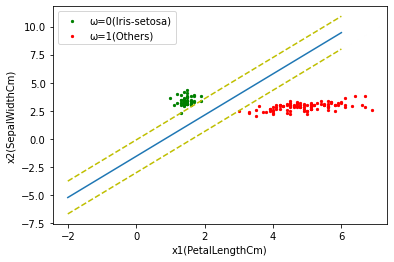

In [7]:
a=np.append(W,b)
print("Decision Boundary:",a@y.T,"= 0")
xx=np.linspace(-2,6,100)
m=-W[0]/W[1]
yy=m*xx-(b)/W[1]
margin=1/np.sqrt(np.sum(W**2))
yy_neg=yy-np.sqrt(1+m**2)*margin
yy_pos=yy+np.sqrt(1+m**2)*margin
plt.plot(xx,yy)
plt.plot(xx,yy_neg,"y--")
plt.plot(xx,yy_pos,"y--")
plt.scatter(x1w0,x2w0,label="ω=0(Iris-setosa)",color="green",marker=".",s=20)
plt.scatter(x1w1,x2w1,label="ω=1(Others)",color="red",marker=".",s=20) 
plt.xlabel('x1(PetalLengthCm)')
plt.ylabel('x2(SepalWidthCm)')
plt.legend()
plt.show()